In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pgeocode
import seaborn as sns
import mpl_toolkits
nomi = pgeocode.Nominatim('ca')

## Dataset 1: Government Radon and Thoron Data

# New columns to store latitude and longitude
df = pd.read_csv('discovery/data/radon-thoron.csv', encoding='latin-1')

df["latitude"] = np.nan
df["longitude"] = np.nan

for row in df.index:
    location = nomi.query_postal_code(df['forwardSortationAreaCodes'][row])
    df['latitude'][row] = location.latitude
    df['longitude'][row] = location.longitude

df.head()

# Remove Naan values for plotting purposes
df = df.dropna()

df.head()


/var/folders/ss/g73jrmvs7d108fqxld50xgxw0000gn/T/ipykernel_43996/2604860221.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude'][row] = location.latitude
/var/folders/ss/g73jrmvs7d108fqxld50xgxw0000gn/T/ipykernel_43996/2604860221.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'][row] = location.longitude
/var/folders/ss/g73jrmvs7d108fqxld50xgxw0000gn/T/ipykernel_43996/2604860221.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

,resultNumber,censusMetropolitanArea,province,forwardSortationAreaCodes,testDurationInDays,averageRadonConcentrationInBqPerM3,averageThoronConcentrationInBqPerM3,latitude,longitude
9,10,Calgary CMA,AB,T1Y,94,125,14.0,51.0823,-113.9578
10,11,Calgary CMA,AB,T1Y,92,123,14.0,51.0823,-113.9578
11,12,Calgary CMA,AB,T1Y,94,114,14.0,51.0823,-113.9578
12,13,Calgary CMA,AB,T1Y,91,91,14.0,51.0823,-113.9578
13,14,Calgary CMA,AB,T2A,90,123,20.0,51.0494,-113.9564


In [4]:
df.describe()


,resultNumber,testDurationInDays,averageRadonConcentrationInBqPerM3,averageThoronConcentrationInBqPerM3,latitude,longitude
count,2914.00000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000
mean,1581.50652,96.256005,119.394303,16.902883,46.517914,-85.752844
std,915.82707,12.894686,146.070049,13.029523,2.961518,18.874004
min,10.00000,30.000000,14.000000,14.000000,42.200700,-123.727600
25%,813.25000,91.000000,43.000000,14.000000,43.925100,-97.218200
50%,1553.50000,92.000000,77.000000,14.000000,45.997600,-79.990200
75%,2341.25000,97.000000,140.750000,14.000000,48.524700,-72.616800
max,3190.00000,301.000000,2117.000000,232.000000,53.745400,-52.672900


<Figure size 1000x1000 with 0 Axes>

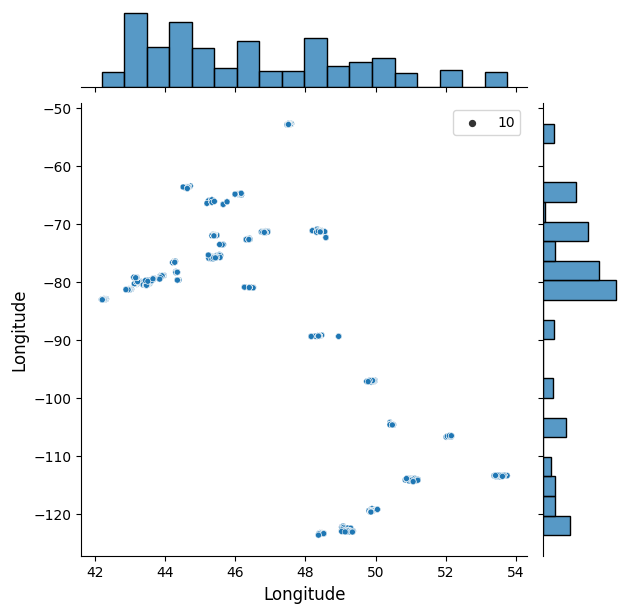

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [5]:
plt.figure(figsize=(10, 10))
sns.jointplot(x=df.latitude.values, y=df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.show()
sns.despine

Text(0.5, 1.0, 'Average Radon vs Longitude')

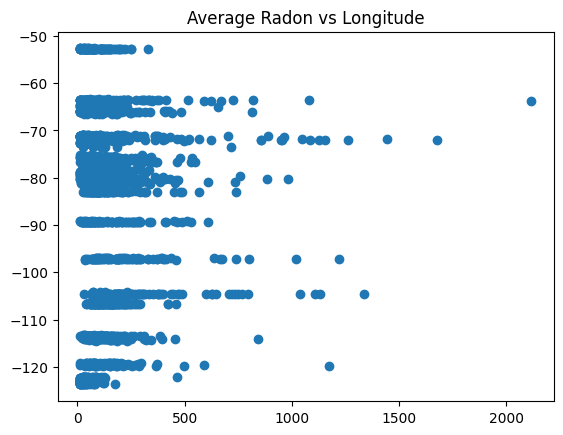

In [6]:
plt.scatter(df.averageRadonConcentrationInBqPerM3, df.longitude)
plt.title("Average Radon vs Longitude")


Text(0.5, 1.0, 'Average Radon vs Latitude')

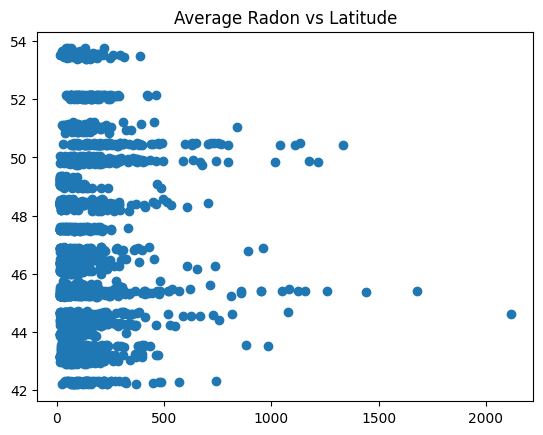

In [7]:
plt.scatter(df.averageRadonConcentrationInBqPerM3, df.latitude)
plt.title("Average Radon vs Latitude")

(0.0, 2500.0)

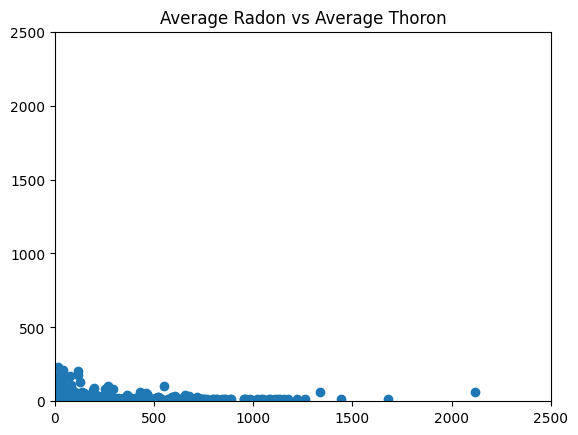

In [14]:
plt.scatter(df.averageRadonConcentrationInBqPerM3, df.averageThoronConcentrationInBqPerM3)
plt.title("Average Radon vs Average Thoron")
plt.xlim([0, 2500])
plt.ylim([0, 2500])

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
labels = df['averageRadonConcentrationInBqPerM3']
train1 = df.drop(['averageRadonConcentrationInBqPerM3', 'censusMetropolitanArea', 'province', 'forwardSortationAreaCodes', 'testDurationInDays', 'resultNumber'], axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size = 0.10, random_state = 2)

reg.fit(x_train, y_train)

reg.score(x_test, y_test)


0.0366482955389309